# Study on Weights Distributions
Visualization for Aging Aware

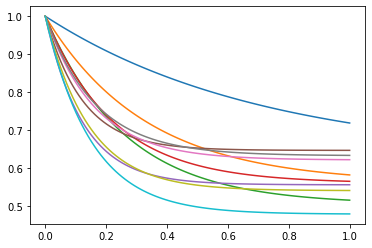

In [15]:
import pickle
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.autograd import Variable
import importlib

with open(os.path.join(os.getcwd(), 'exp_aging_model.p'), 'rb') as f:
    age_generator = pickle.load(f)

models = age_generator.get_models(10)
t = np.linspace(0,1,100)
for model in models:
    plt.plot(t, model(t));

In [16]:
R = np.random.rand(4)
R.shape

(4,)

In [17]:
def aging(g, models, t):
    decays = np.array([model([t]) for model in models]).flatten()
    return g * decays

In [18]:
def getweights(R, models, t):
    g = 1 / R
    if models is not None:
        g = aging(g, models, t)
    g = g / np.sum(g)
    W = g[:-2]
    return W

In [19]:
def showtrace(R, age_generator):
    models = age_generator.get_models(4)

    T = np.linspace(0,1,100)
    Ws = []
    for t in T:
        W = getweights(R, models, t)
        Ws.append(W)
    Ws = np.array(Ws)
    w1 = Ws[:,0]
    w2 = Ws[:,1]
    
    return w1, w2

In [20]:
# N, M = 3, 4
W0 = getweights(R, models=None, t=0)
# fig, ax = plt.subplots(nrows = N, ncols = M, figsize=(20,20/M*N))
# for i in range(M):
#     for j in range(N):
#         w1, w2 = showtrace(R, age_generator)
#         ax[j,i].plot(w1,w2);
#         ax[j,i].plot(W0[0],W0[1], '.', markersize=10, color='red');

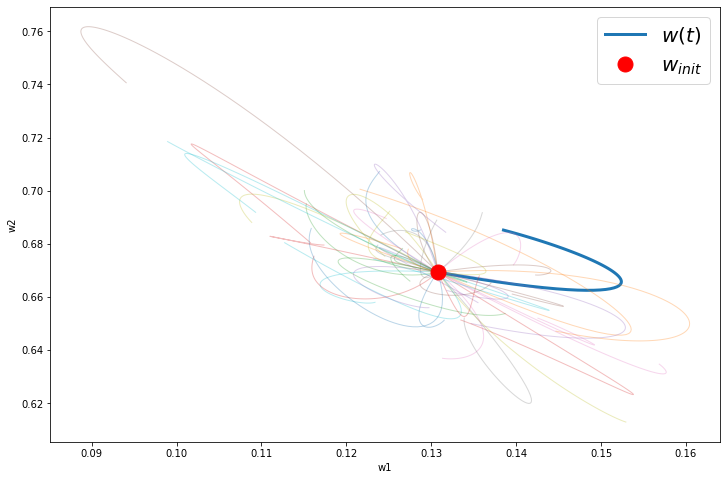

In [21]:
W1, W2 = [], []
import numpy as np
np.random.seed(19950102)
plt.figure(figsize=[12,8])
for i in range(50):
    w1, w2 = showtrace(R, age_generator)
    if not i:
        plt.plot(w1, w2, '-', linewidth=3, label='$w(t)$')
    else:
        plt.plot(w1,w2, '-', linewidth=1, alpha=0.3);
    W1.append(w1)
    W2.append(w2)    

plt.plot(W0[0], W0[1], '.', markersize=30, color='red', label='$w_{init}$');
plt.xlabel('w1');
plt.ylabel('w2');
plt.legend(fontsize=20);
plt.savefig(f'./figures/agingcurves.pdf', format='pdf')

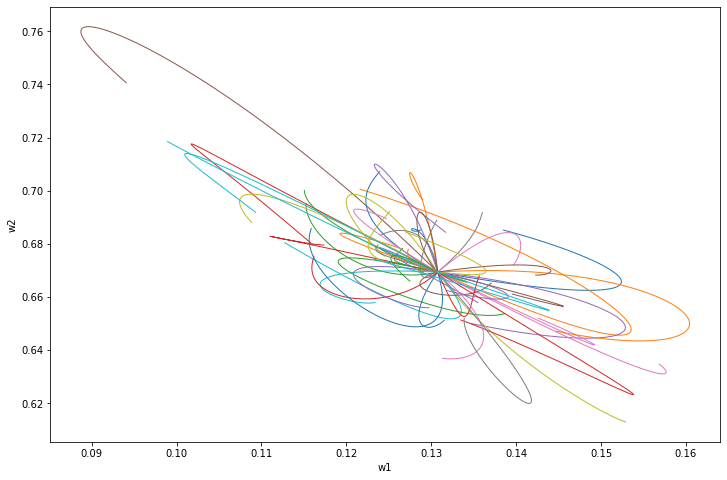

In [33]:
plt.figure(figsize=[12,8])
for w1, w2 in zip(W1, W2):
    plt.plot(w1,w2, '-', linewidth=1);
plt.xlabel('w1');
plt.ylabel('w2');
plt.savefig(f'./figures/agingcurves2.pdf', format='pdf')

# Aging Aware with Model Variation
Previously, we optimize the following functional:
$$ \min_\theta \, \int_{t=0}^{1} \; L(\theta(t)) \, {\rm d}t. $$
The optimum is for a specific aging model $\omega$, i.e., we minimized the 
$$ \min_\theta \, \int_{t=0}^{1} \; L(\theta(t,\omega)) \, {\rm d}t. $$
However, we dont know how will the resistance decay, i.e., we should also minimize the loss function w.r.t. aging models with different parameters. That means we need to optimized
$$ \min_\theta \, \int_{\omega}\int_{t=0}^{1} \; L(\theta(t,\omega)) \, {\rm d}t\, p(\omega){\rm d}\omega. $$

# Aging Model Approximation

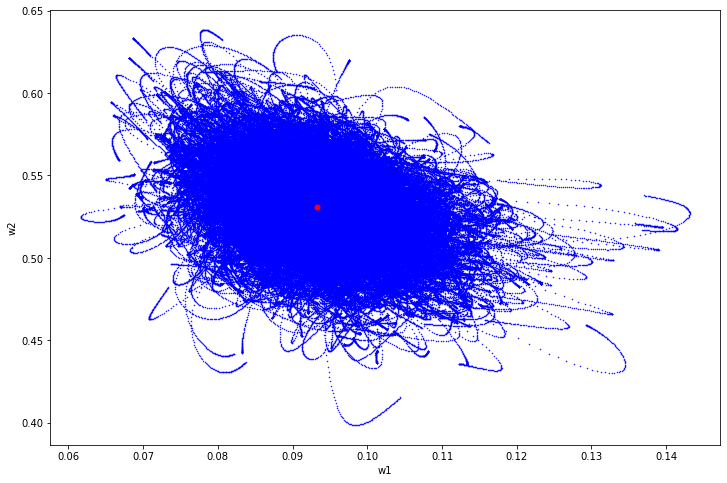

In [11]:
W1, W2 = [], []
plt.figure(figsize=[12,8])
for i in range(5000):
    w1, w2 = showtrace(R, age_generator)
    W1.append(w1)
    W2.append(w2)
    plt.plot(w1,w2, '.', markersize=1, color='blue');

plt.plot(W0[0], W0[1], '.', markersize=10, color='red');
plt.xlabel('w1');
plt.ylabel('w2');
plt.savefig(f'./figures/manyagingcurves.pdf', format='pdf')

In [13]:
import numpy as np
W1 = np.array(W1).flatten()
W2 = np.array(W2).flatten()

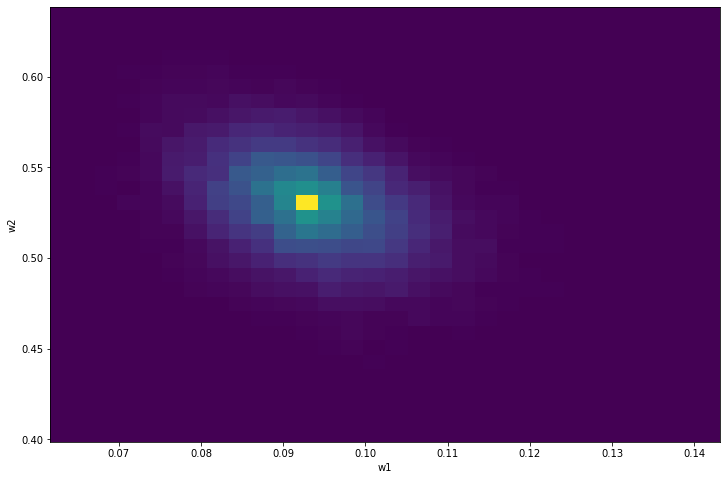

In [14]:
plt.figure(figsize=[12,8])
plt.hist2d(W1,W2, bins=[30,30]);
plt.xlabel('w1');
plt.ylabel('w2');
plt.savefig(f'./figures/manyagingcurveshist.pdf', format='pdf')